In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [20]:
df = pd.read_csv('BETF Final.csv')
df.head(50)

,Date,Closing Price,IBIT,FBTC,BITB,ARKB,BTCO,EZBC,BRRR,HODL,BTCW,GBTC,Total
0,11-01-2024,46368.58594,111.7,227.0,237.9,65.3,17.4,50.1,29.4,10.6,1.0,-95.1,655.3
1,12-01-2024,42853.16797,386.0,195.3,17.4,39.8,28.4,0.0,20.2,0.0,0.0,-484.1,203.0
2,16-01-2024,43154.94531,212.7,102.0,50.2,122.3,31.9,0.0,15.3,7.3,0.0,-594.4,-52.7
3,17-01-2024,42742.65234,371.4,358.1,68.2,50.3,57.6,1.2,1.2,4.8,1.6,-460.6,453.8
4,18-01-2024,41262.05859,145.5,177.9,20.1,41.8,58.8,0.0,9.3,2.3,0.0,-582.3,-126.6
5,19-01-2024,41618.40625,201.5,222.3,56.7,62.6,63.4,0.0,10.4,14.2,2.9,-590.4,43.6
6,22-01-2024,39507.36719,260.6,158.7,41.6,65.0,5.6,4.7,9.7,6.8,0.4,-640.5,-87.4
7,23-01-2024,39845.55078,160.1,157.7,26.3,61.8,0.0,1.1,0.0,2.2,0.0,-515.3,-106.1
8,24-01-2024,40077.07422,66.2,125.7,19.1,24.9,19.9,1.2,9.1,4.5,0.4,-429.3,-158.3
9,25-01-2024,39933.80859,170.7,101.0,20.0,16.1,0.0,0.0,6.5,0.0,0.0,-394.1,-79.8


In [21]:
df.tail(50)

,Date,Closing Price,IBIT,FBTC,BITB,ARKB,BTCO,EZBC,BRRR,HODL,BTCW,GBTC,Total
47,20-03-2024,67913.67188,49.3,12.9,18.6,23.3,-10.2,19.0,2.9,9.3,0.0,-386.6,-261.5
48,21-03-2024,65491.39063,233.4,2.9,12.0,2.0,4.2,3.8,4.7,1.8,0.0,-358.8,-94.0
49,22-03-2024,63778.76172,18.9,18.1,16.3,5.4,4.5,29.6,25.5,0.0,0.0,-169.9,-51.6
50,25-03-2024,69958.81250,35.5,261.8,14.0,0.0,18.5,20.5,11.2,4.0,0.0,-350.1,15.4
51,26-03-2024,69987.83594,162.2,279.1,16.7,73.6,26.7,26.3,29.9,15.8,0.0,-212.3,418.0
52,27-03-2024,69455.34375,323.8,1.5,0.0,200.7,4.8,4.0,5.1,1.9,1.5,-299.8,243.5
53,28-03-2024,70744.95313,95.1,68.1,67.0,27.6,3.9,0.0,6.0,20.0,0.0,-104.9,182.8
54,01-04-2024,69702.14844,165.9,44.0,1.1,-0.3,4.2,0.0,0.0,2.0,0.0,-302.6,-85.7
55,02-04-2024,65446.97266,150.5,44.8,4.3,-87.5,0.0,0.0,3.7,5.6,0.0,-81.9,39.5
56,03-04-2024,65980.81250,42.0,116.7,23.0,0.0,0.0,3.8,0.0,0.0,3.1,-75.1,113.5


In [22]:
y = df['Closing Price']

In [23]:
X = df[['IBIT', 'FBTC', 'BITB', 'ARKB', 'BTCO',
       'EZBC', 'BRRR', 'HODL', 'BTCW',
       'GBTC', ]]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=410)

In [25]:
from sklearn.linear_model import LinearRegression

#lm = LinearRegression()
#lm.fit(X_train,y_train)

In [26]:
# Fit the XGBoost model


xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=410)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=410, ...)

In [27]:
predictions = xgb_model.predict(X_test)
predictions

array([57026.3  , 57109.89 , 68121.38 , 46540.348, 61123.418, 61416.383,
       52103.418, 62789.984, 61848.367, 62689.957, 61015.64 , 62924.355,
       56717.832, 61962.96 , 59422.047, 51762.324, 62287.754, 66328.1  ,
       45815.62 , 68623.61 , 65385.88 , 65655.62 , 44231.605, 60906.49 ,
       62002.926, 40723.25 , 59347.02 , 68672.375, 62167.168, 68079.04 ],
      dtype=float32)

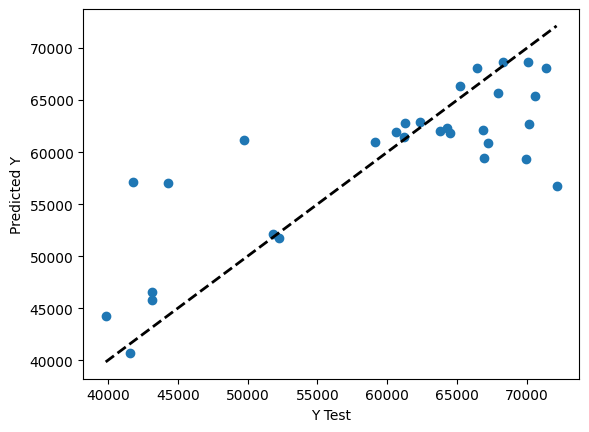

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

In [29]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4354.513281416666
MSE: 38604668.01492843
RMSE: 6213.265487240057


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)*100

64.02715891645452

In [31]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("Predicted and Actual Values:")
print(results_df)

Predicted and Actual Values:
         Actual     Predicted
18  44318.22266  57026.300781
10  41816.87109  57109.890625
70  66407.27344  68121.382812
2   43154.94531  46540.347656
22  49742.44141  61123.417969
33  61198.38281  61416.382812
23  51826.69531  52103.417969
66  61276.69141  62789.984375
72  64481.70703  61848.367188
90  70136.53125  62689.957031
77  59123.43359  61015.640625
80  62334.81641  62924.355469
40  72123.90625  56717.832031
75  60636.85547  61962.960938
38  66925.48438  59422.046875
26  52284.87500  51762.324219
71  64276.89844  62287.753906
87  65231.58203  66328.101562
15  43185.85938  45815.621094
39  68300.09375  68623.609375
61  70587.88281  65385.878906
92  67929.56250  65655.617188
7   39845.55078  44231.605469
63  67195.86719  60906.488281
73  63755.32031  62002.925781
5   41618.40625  40723.250000
50  69958.81250  59347.019531
62  70060.60938  68672.375000
69  66837.67969  62167.167969
43  71396.59375  68079.039062


<Axes: xlabel='Closing Price', ylabel='Count'>

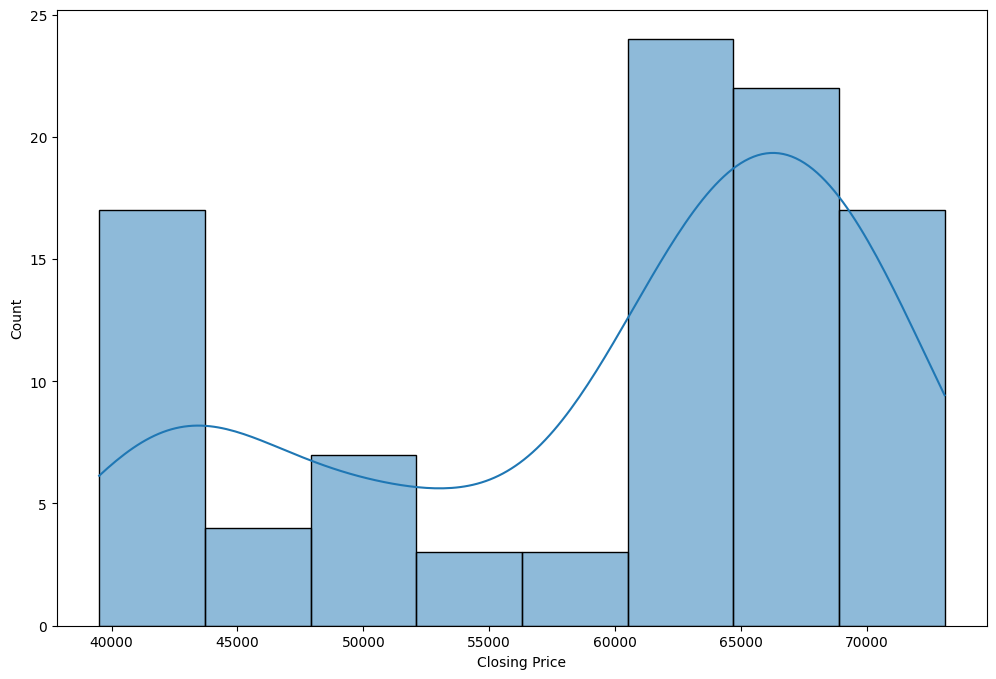

In [32]:
plt.figure(figsize = (12,8))
sns.histplot(x= 'Closing Price',data = df,kde = True)

<Axes: xlabel='Closing Price', ylabel='Count'>

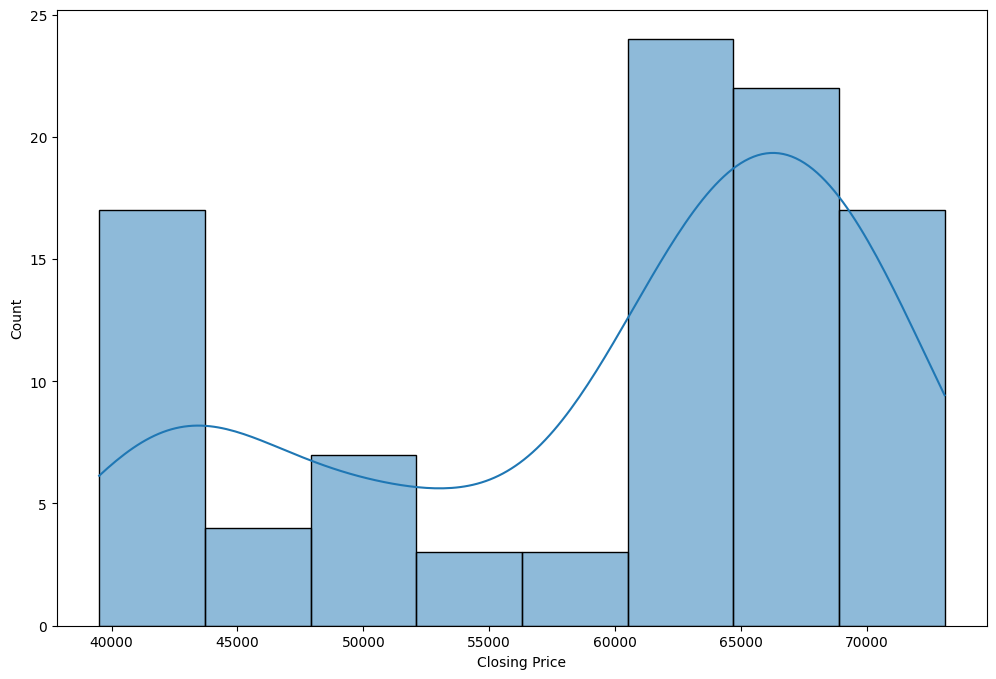

In [33]:
df['expenses'] = np.log(df['Closing Price'])
plt.figure(figsize = (12,8))
sns.histplot(x= 'Closing Price',data = df,kde = True)

In [39]:
new_data = pd.DataFrame({
    'IBIT': [120],
    'FBTC': [175],
    'BITB': [5],
    'ARKB': [50],
    'BTCO': [1],
    'EZBC': [2],
    'BRRR': [3],
    'HODL': [4],
    'BTCW': [5],
    'GBTC': [-20]
})

# Predicting the expenses for the new data
predicted_btc_closing_price = xgb_model.predict(new_data)

print(predicted_btc_closing_price )

#print(f"Predicted btc closing price: {predicted_btc_closing_price:.2f}")

# Convert the predicted log expenses back to the original scale
#predicted_value = np.exp(predicted_btc_closing_price[0])
                      
#print(f"Predicted value: {predicted_value:.2f}")

[56899.145]
